In [1]:
path = "data/data123665"
! ls -l $path

! rm -rf cifar-10-batches-py
! tar -zxf $path/cifar-10-python.tar.gz
! ls -l cifar-10-batches-py


总用量 197292
-rwxrwxrwx 1 root root 170498071 12月 29 14:41 cifar-10-python.tar.gz
-rwxrwxrwx 1 root root  30720128 12月 29 14:40 data.npy
-rwxrwxrwx 1 root root    800128 12月 29 14:40 label.npy
总用量 181876
-rw-r--r-- 1 aistudio users      158 3月  31  2009 batches.meta
-rw-r--r-- 1 aistudio users 31035704 3月  31  2009 data_batch_1
-rw-r--r-- 1 aistudio users 31035320 3月  31  2009 data_batch_2
-rw-r--r-- 1 aistudio users 31035999 3月  31  2009 data_batch_3
-rw-r--r-- 1 aistudio users 31035696 3月  31  2009 data_batch_4
-rw-r--r-- 1 aistudio users 31035623 3月  31  2009 data_batch_5
-rw-r--r-- 1 aistudio users       88 6月   5  2009 readme.html
-rw-r--r-- 1 aistudio users 31035526 3月  31  2009 test_batch


* 此版本通过下载原始的cifar10数据集 因为刚好是50000 对此进行了格式转换

> 但由于标签只能填充为10等其他原因，效果不如66.1342 < 71.4860


In [2]:
import numpy as np
import pandas as pd

In [3]:
X = np.load(f"{path}/data.npy")
X.shape

(10000, 32, 32, 3)

In [4]:
Y = np.load(f"{path}/label.npy")
Y.shape

(10000, 10)

In [5]:
pd.DataFrame(Y)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.0,8.913862,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,3.098864,0.0
2,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,3.390307,0.0
3,9.983173,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2.291458,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.324461,0.0
9996,0.000000,0.000000,0.0,5.604493,0.0,0.000000,0.000000,0.000000,0.000000,0.0
9997,0.000000,0.000000,0.0,0.000000,0.0,8.759615,0.000000,0.000000,0.000000,0.0
9998,0.000000,8.175869,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [6]:
N = 2
import matplotlib.pyplot as plt
img = X[N]
print(list(Y[N]), img.shape)
plt.imshow(img) 
plt.show()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.390307408196006, 0.0] (32, 32, 3)


<Figure size 640x480 with 1 Axes>

0 9
(3072,) 9 (32, 32, 3)


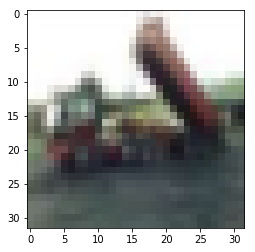

In [7]:
import pickle
with open(f"cifar-10-batches-py/data_batch_1", 'rb') as fo:
    data = pickle.load(fo, encoding='bytes')
print(min(data[b"labels"]), max(data[b"labels"]))

N = 2
import matplotlib.pyplot as plt
img = data[b"data"][N].reshape(3, 32, 32).transpose(1,2,0)
print(data[b"data"][N].shape, data[b"labels"][N], img.shape)
plt.imshow(img) 
plt.show()


In [8]:
t = np.array([img])
print(t.shape)
with open('test.npy', 'wb') as f:
    np.save(f, t)

y = 0
iy = np.array([10.0 if i == y else 0.0 for i in range(0, 10)])
np.array([iy, iy]).shape

(1, 32, 32, 3)


(2, 10)

In [9]:

import pickle
from tqdm import tqdm, trange

X, _Y, Y = [], [], []
for p in [1, 2, 3, 4, 5]:
    with open(f"cifar-10-batches-py/data_batch_{p}", 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    
    for n in trange(0, 10000):
        iX = data[b"data"][n].reshape(3, 32, 32).transpose(1,2,0)
        iY = np.array([10.0 if i == data[b"labels"][n] else 0.0 for i in range(0, 10)])
        
        X.append(iX)
        _Y.append(data[b"labels"][n])
        Y.append(iY)

        if n > 9995:
            break
print(pd.value_counts(_Y))

for [ifile, idata] in tqdm([['data.npy', X], ['label.npy', Y]]):
    with open(ifile, 'wb') as f:
        np.save(f, idata)
    print(ifile, np.load(ifile).shape)
    ! ls -l -h $ifile


  0%|          | 0/2 [00:00<?, ?it/s]

4    5000
0    5000
9    4999
8    4999
6    4999
3    4999
7    4998
5    4998
2    4998
1    4995
dtype: int64
data.npy (49985, 32, 32, 3)
-rw-r--r-- 1 aistudio aistudio 147M 12月 29 15:04 data.npy


 50%|█████     | 1/2 [00:01<00:01,  1.73s/it]

label.npy (49985, 10)
-rw-r--r-- 1 aistudio aistudio 3.9M 12月 29 15:04 label.npy


100%|██████████| 2/2 [00:02<00:00,  1.29s/it]
